In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})

In [3]:
def get_scouting_data(input_filename):
    """
    This function reads the scouting data, cleans some of the data and renames the columns.

    """

    # Read data and set empty cells to 0.
    data = pd.read_csv(input_filename).fillna(0)

    # Convert Climbing column to a numeric value.
    data['ClimbScore'] = data['Climbing'].map({'Level 3': 12, 'Level 2': 6, 'Level 1': 3, 'Not on HAB': 0})

    # Convert percentage column to numeric value
    data['FractionDefense'] = data['% of time playing defense'].apply(lambda x: float(x.rstrip('%')))

    data = data.rename(columns={
        'Your name (FirstName LastName)': 'ScoutName',
        'Match #': 'Match',
        'Team #': 'Team',
        'Starting Position': 'StartPosition',
        'Starts on Level 2?': 'StartLevel2',
        'Moved during sandstorm?': 'MovedSandstorm',
        'Crossed HAB line?': 'HabLine',
        'Starts with': 'StartingPiece',
        '# of hatch panels placed during sandstorm': 'HatchSandstorm',
        '# of cargo placed during sandstorm': 'CargoSandstorm',
        '# of hatch panels on the cargo bay': 'HatchCargoBay',
        '# of hatch panels on the bottom of the rocket': 'HatchBottomRocket',
        '# of hatch panels on the middle of the rocket': 'HatchMidRocket',
        '# of hatch panels on the top of the rocket': 'HatchTopRocket',
        '# of hatch panels missed': 'HatchMissed',
        '# of cargo in the cargo bay': 'CargoCargoBay',
        '# of cargo in the bottom of the rocket': 'CargoBottomRocket',
        '# of cargo in the middle of the rocket': 'CargoMidRocket',
        '# of cargo in the top of the rocket': 'CargoTopRocket',
        '# of cargo missed': 'CargoMissed',
        'Played defense successfully': 'DefenseSuccess',
        'Weak to defense (tippy, easily pushed, etc)': 'WeakDefense',
        '% of time playing defense': 'PercentDefense',
        '# of fouls': 'Fouls',
        '# of tech fouls': 'TechFouls',
        'Robot disabled': 'RobotDisabled',
        'Robot failure': 'RobotFail',
        'Tipped over': 'TippedOver',
        'Reckless driving': 'Reckless',
        'Yellow card': 'YellowCard',
        'Red card': 'RedCard',
        })

    return data

In [4]:
def get_summary_data(input_filename):
    """
    This summary function is the same as used in the Google spreadsheet.

    """

    scouting_data = get_scouting_data(input_filename)

    # Convert required boolean columns to integers
    scouting_data['HabLine'] = scouting_data['HabLine'].astype(int)
    scouting_data['StartLevel2'] = scouting_data['StartLevel2'].astype(int)

    data = scouting_data[[
        'Match',
        'Team',
        'StartLevel2',
        'HabLine',
        'HatchSandstorm',
        'CargoSandstorm',
        'HatchCargoBay',
        'HatchBottomRocket',
        'HatchMidRocket',
        'HatchTopRocket',
        'CargoCargoBay',
        'CargoBottomRocket',
        'CargoMidRocket',
        'CargoTopRocket',
        'ClimbScore'
    ]]
    data = data.groupby(['Match', 'Team']).mean().groupby('Team').mean()

    data['HabScore'] = 3 * data['HabLine'] * (data['StartLevel2'] + 1)
    data['HatchScore'] = 2 * (data['HatchSandstorm'] + data['HatchCargoBay'] + data['HatchBottomRocket'] + data['HatchMidRocket'] + data['HatchTopRocket'])
    data['CargoScore'] = 3 * (data['CargoSandstorm'] + data['CargoCargoBay'] + data['CargoBottomRocket'] + data['CargoMidRocket'] + data['CargoTopRocket'])
    data['Score'] = data['HabScore'] + data['HatchScore'] + data['CargoScore'] + data['ClimbScore']

    # Sort the teams by total score in descending order.
    sorted_data = data.sort_values('Score', ascending=False)

    return sorted_data

In [5]:
def get_summary_data_poc(input_filename):
    """
    This summary function is just a proof of concept.

    """

    scouting_data = get_scouting_data(input_filename)

    # Convert required boolean columns to integers
    scouting_data['HabLine'] = scouting_data['HabLine'].astype(int)
    scouting_data['StartLevel2'] = scouting_data['StartLevel2'].astype(int)
    scouting_data['DefenseSuccess'] = scouting_data['DefenseSuccess'].astype(int)
    scouting_data['RobotDisabled'] = scouting_data['RobotDisabled'].astype(int)
    scouting_data['RobotFail'] = scouting_data['RobotFail'].astype(int)
    scouting_data['TippedOver'] = scouting_data['TippedOver'].astype(int)
    scouting_data['Reckless'] = scouting_data['Reckless'].astype(int)

    data = scouting_data[[
        'Match',
        'Team',
        'StartLevel2',
        'HabLine',
        'HatchSandstorm',
        'CargoSandstorm',
        'HatchCargoBay',
        'HatchBottomRocket',
        'HatchMidRocket',
        'HatchTopRocket',
        'CargoCargoBay',
        'CargoBottomRocket',
        'CargoMidRocket',
        'CargoTopRocket',
        'DefenseSuccess',
        'Fouls',
        'TechFouls',
        'RobotDisabled',
        'RobotFail',
        'TippedOver',
        'Reckless',
        'ClimbScore',
        'FractionDefense'
    ]]
    data = data.groupby(['Match', 'Team']).mean().groupby('Team').mean()

    data['HabScore'] = 3 * data['HabLine'] * (data['StartLevel2'] + 1)
    data['HatchScore'] = 2 * (data['HatchSandstorm'] + data['HatchCargoBay'] + data['HatchBottomRocket'] + 1.1 * data['HatchMidRocket'] + 1.1 * data['HatchTopRocket'])
    data['CargoScore'] = 3 * (data['CargoSandstorm'] + data['CargoCargoBay'] + data['CargoBottomRocket'] + 1.1 * data['CargoMidRocket'] + 1.1 * data['CargoTopRocket'])
    data['DefenseScore'] = 10 * data['DefenseSuccess'] * data['FractionDefense'] / 100
    data['FoulScore'] = 3 * data['Fouls'] + 10 * data['TechFouls']
    data['FailScore'] = 5 * (data['RobotDisabled'] + data['RobotFail'] + data['TippedOver'] + data['Reckless'])

    # Find the worst Foul/Fail score, and use it to determine a positive OppPenaltyScore.
    max_foul_fail = (data['FoulScore'] + data['FailScore']).max()
    data['OppPenaltyScore'] = max_foul_fail - (data['FoulScore'] + data['FailScore'])

    data['Score'] = data['HabScore'] + data['HatchScore'] + data['CargoScore'] + data['ClimbScore'] + data['DefenseScore'] + data['OppPenaltyScore']

    # Sort the teams by total score in descending order.
    sorted_data = data.sort_values('Score', ascending=False)

    return sorted_data

In [6]:
def plot_scores(summary_data, title='Scouting Data', horizontal=True, output_filename=''):
    """
    Plot the scores (simple cummulative scores)

    """

    colors = 'blue', 'red', 'yellow', 'lime'

    if horizontal:
        data = summary_data.sort_values('Score')
        data = data.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore']]
        data.plot.barh(stacked=True, figsize=(12, 18), width=0.75, title=title, color=colors)
    else:
        data = summary_data.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore']]
        data.plot.bar(stacked=True, figsize=(16, 10), width=0.75, title=title, color=colors)

    if output_filename:
        plt.savefig(output_filename)
        plt.close()

In [7]:
def plot_scores_poc(summary_data, title='Scouting Data (POC)', horizontal=True, output_filename=''):
    """
    Plot the scores (proof of concept)

    """

    colors = 'blue', 'red', 'yellow', 'lime', 'magenta', 'tab:brown'

    if horizontal:
        data = summary_data.sort_values('Score')
        data = data.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore', 'DefenseScore', 'OppPenaltyScore']]
        data.plot.barh(stacked=True, figsize=(12, 18), width=0.75, title=title, color=colors)
    else:
        data = summary_data.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore', 'DefenseScore', 'OppPenaltyScore']]
        data.plot.bar(stacked=True, figsize=(16, 10), width=0.75, title=title, color=colors)

    if output_filename:
        plt.savefig(output_filename)
        plt.close()

In [8]:
auburn_data = get_summary_data('../Data/Scouting_2019/Auburn_MtView.csv')

In [9]:
auburn_data.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore', 'Score']]

,HabScore,HatchScore,CargoScore,ClimbScore,Score
Team,,,,,
2046,6.000000,8.583333,12.500000,9.500000,36.583333
1983,4.812500,5.166667,11.750000,11.000000,32.729167
2928,6.000000,6.000000,3.000000,6.000000,21.000000
2976,3.250000,5.666667,8.750000,2.250000,19.916667
4131,3.272727,4.545455,9.272727,2.181818,19.272727
5827,3.000000,6.545455,0.000000,9.545455,19.090909
948,4.812500,1.500000,9.250000,3.000000,18.562500
3588,4.354167,5.666667,4.500000,3.750000,18.270833
1903,0.000000,0.000000,15.000000,3.000000,18.000000


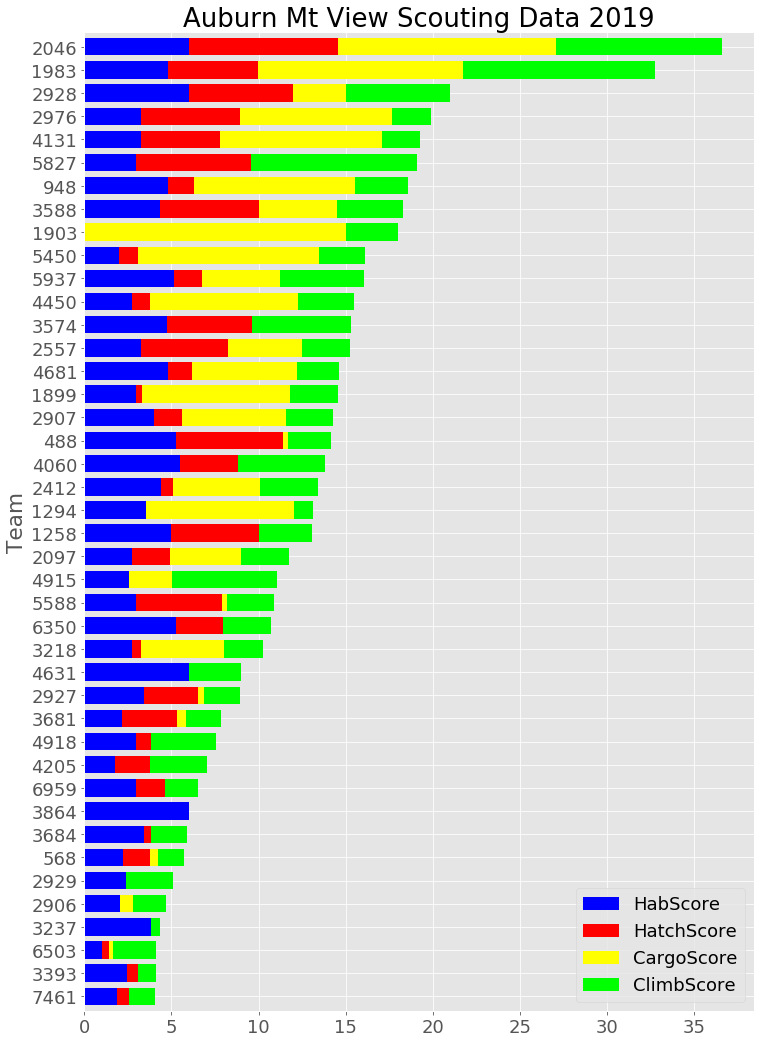

In [10]:
plot_scores(auburn_data, 'Auburn Mt View Scouting Data 2019')

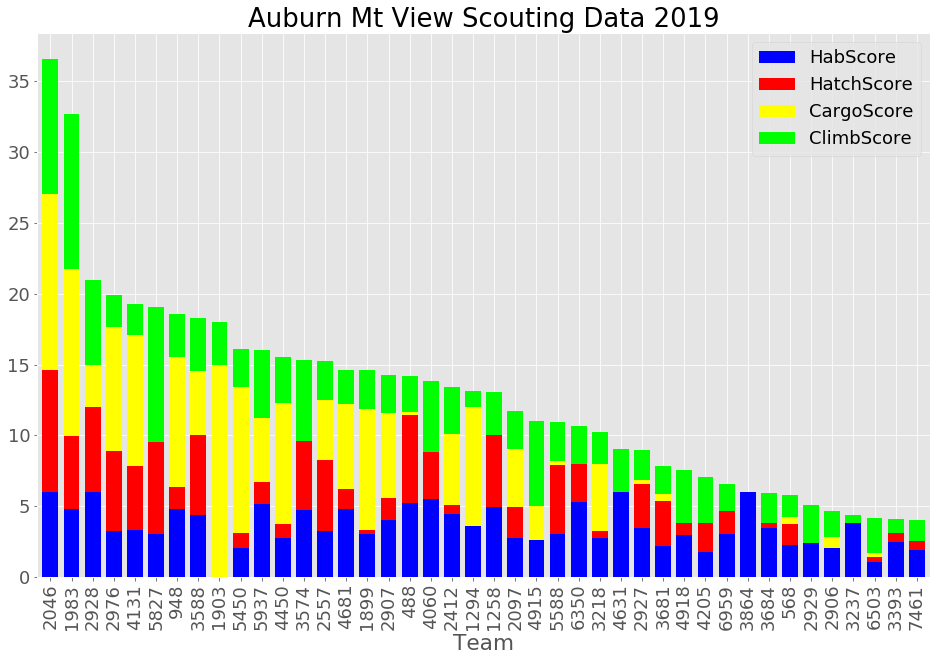

In [11]:
plot_scores(auburn_data, 'Auburn Mt View Scouting Data 2019', horizontal=False)

In [12]:
auburn_data_poc = get_summary_data_poc('../Data/Scouting_2019/Auburn_MtView.csv')

In [13]:
auburn_data_poc.loc[:, ['HabScore', 'HatchScore', 'CargoScore', 'ClimbScore', 'DefenseScore', 'OppPenaltyScore', 'Score']]

,HabScore,HatchScore,CargoScore,ClimbScore,DefenseScore,OppPenaltyScore,Score
Team,,,,,,,
2046,6.000000,9.050000,13.075000,9.500000,0.010417,9.583333,47.218750
1983,4.812500,5.200000,11.825000,11.000000,0.083333,10.000000,42.920833
2928,6.000000,6.400000,3.000000,6.000000,1.000000,10.000000,32.400000
2976,3.250000,5.750000,8.800000,2.250000,0.006944,9.583333,29.640278
4131,3.272727,4.545455,9.272727,2.181818,0.000000,10.000000,29.272727
5827,3.000000,6.545455,0.000000,9.545455,0.000000,10.000000,29.090909
1903,0.000000,0.000000,15.000000,3.000000,0.000000,10.000000,28.000000
3588,4.354167,5.833333,4.525000,3.750000,0.388889,8.833333,27.684722
948,4.812500,1.500000,9.250000,3.000000,0.083333,8.750000,27.395833


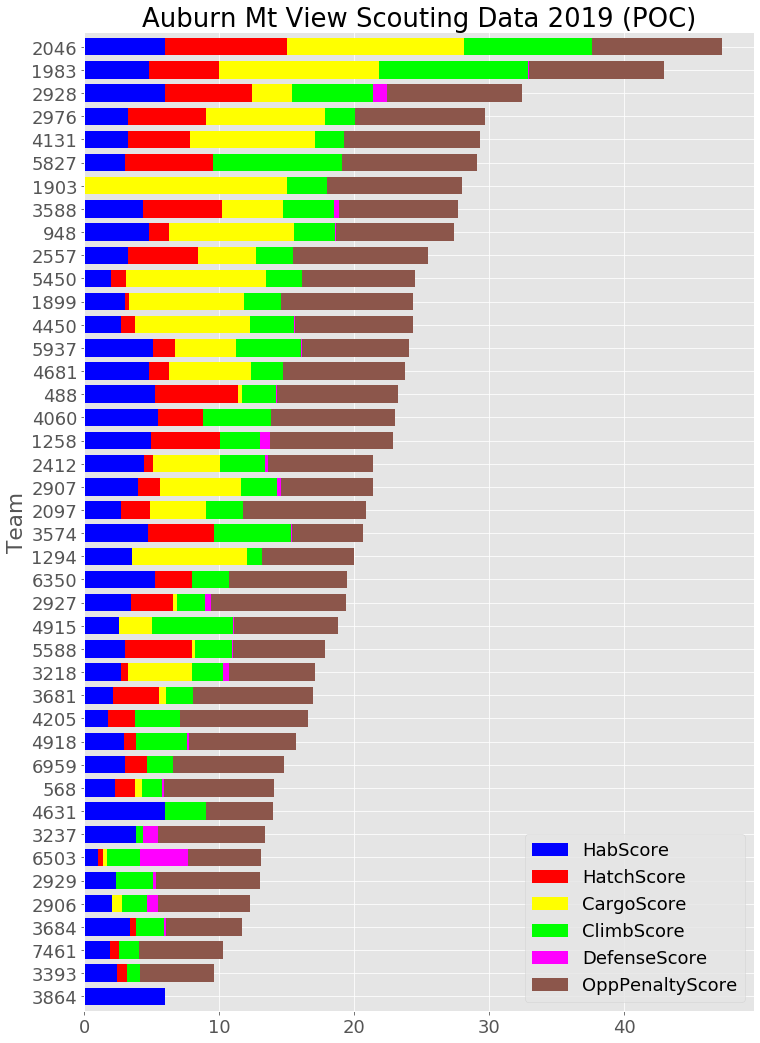

In [14]:
plot_scores_poc(auburn_data_poc, 'Auburn Mt View Scouting Data 2019 (POC)')

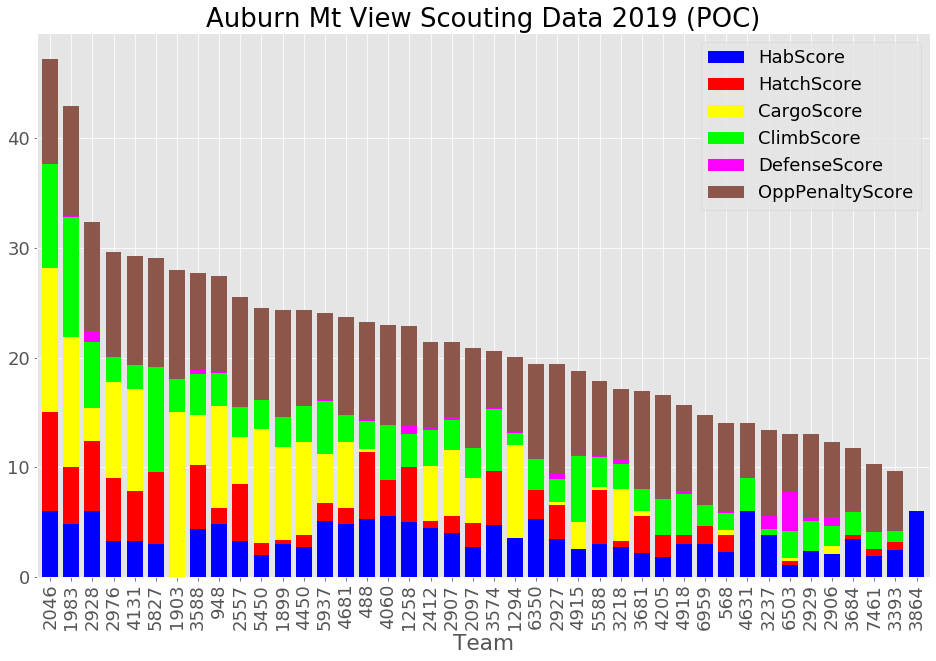

In [15]:
plot_scores_poc(auburn_data_poc, 'Auburn Mt View Scouting Data 2019 (POC)', horizontal=False)